Bluetooth IO Dependencies:
    - bluez : check install_bluez.sh
    - Python LIB: Adafruit_BluefruitLE: https://github.com/adafruit/Adafruit_Python_BluefruitLE

In [ ]:
# ! ./readAda.py > 1013__test.csv
# %matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
dfc = pd.read_csv('0303__calibrate.csv',index_col=0).iloc[:-1]
dfc.set_index(pd.to_datetime(dfc.index,unit='s'),inplace=True)
# dfc.index.name
dfc.reset_index(inplace=True)
# %matplotlib inline
# df.plot.scatter('green','blue')
# dfc= df.reset_index()
dfc.plot(y=['led1','green'])
# dfc.plot.line('time','green')

dfc['dilution'] = np.nan

# start = '2019-03-03 20:08:05.470000029'
# end = '2019-03-03 20:08:11.630000114'
start,end = 305,325
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 2

# start = '2019-03-03 20:07:43.630000114'
# end = '2019-03-03 20:08:02.670000076'
start,end = 271,290
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 3


start,end = 235,255
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 4

start,end = 200,225
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 5


fig,ax = plt.subplots(1,1,figsize=[12,4])
dfc.plot(y= ['green','dilution'],secondary_y='dilution',ax=ax)
plt.grid(1)

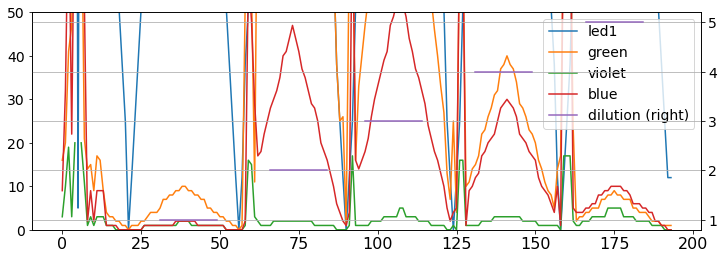

In [30]:
dfc = pd.read_csv('0303__calibrate-1.csv',index_col=0).iloc[:-1]
dfc.set_index(pd.to_datetime(dfc.index,unit='s'),inplace=True)
# dfc.index.name
dfc.reset_index(inplace=True)
# %matplotlib inline
# df.plot.scatter('green','blue')
# dfc= df.reset_index()
# dfc.plot(y=['led1','green'])
# dfc.plot.line('time','green')

dfc['dilution'] = np.nan

# start = '2019-03-03 20:08:05.470000029'
# end = '2019-03-03 20:08:11.630000114'
start,end = 30,50
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 1

start,end = 65,85
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 2

# start = '2019-03-03 20:07:43.630000114'
# end = '2019-03-03 20:08:02.670000076'
start,end = 95,115
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 3


start,end = 130,150
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 4

start,end = 165,185
flag = dfc.eval('(index > @start) and (index < @end)')
dfc.loc[flag,'dilution'] = 5


fig,ax = plt.subplots(1,1,figsize=[12,4])
dfc.plot(y= ['led1','green','violet','blue','dilution'],secondary_y='dilution',ax=ax)
ax.set_ylim(0,50)
plt.grid(1)

{'dilution': 1.0, 'b0': -0.590922681150843, 'b1': 0.04340581651021845}
{'dilution': 2.0, 'b0': -4.102536827515081, 'b1': 1.02996164136286}
{'dilution': 3.0, 'b0': -2.144527568180058, 'b1': 0.5464615899667792}
{'dilution': 4.0, 'b0': -1.6125793203104222, 'b1': 0.1653682268671919}
{'dilution': 5.0, 'b0': -0.9970613661799116, 'b1': 0.03885229092809897}


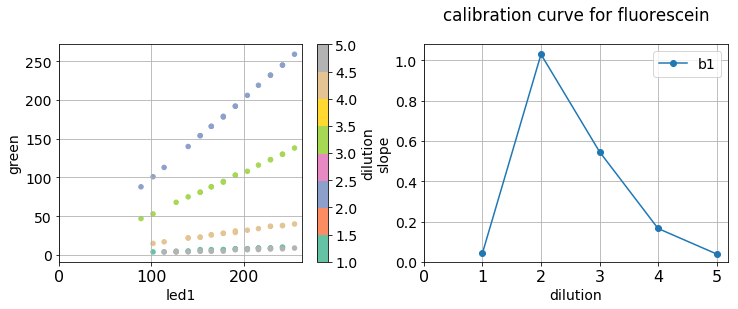

In [34]:
import pymisca.vis_util as pyvis
dfcc = dfc.query('~dilution.isnull()')

xyHeader = ['led1','green']
outHeader= ['b0','b1'][::-1]
key = 'dilution'
lst = []
for k,df in dfcc.groupby(key):
    x,y = df[xyHeader].values.T
    res = np.polyfit(y=y,x=x,deg=1)
    res = dict(zip(outHeader,res))
    res[key] = k
    lst += [res]
    print res
resDF =  pd.DataFrame(lst)


plt.rcParams['font.size'] = 14.
plt.rcParams['xtick.labelsize'] = 16.
plt.rcParams['axes.titlepad'] = 24.

fig, axs = plt.subplots(1,2,figsize=[12,4])

ax = axs[0]
plt.sca(ax)
# dfccc = 
# vdf = dfcc.pivot_table(index='led1',values='green',columns='dilution')
# vdf
# pyvis.linePlot4DF(vdf,ax=ax,xs=vdf.index)
# pyvis.lin
dfcc.plot.scatter('led1','green',c='dilution',
                  cmap='Set2',ax=ax)
ax.set_xlim([0,None])
ax.grid(1)

ax = axs[1]
resDF.plot('dilution','b1', marker='o',ax=ax)

ax.set_xlim([0,None])
ax.set_ylim([0,None])
ax.set_ylabel('slope')
ax.grid(1)
ax.set_title('calibration curve for fluorescein')
fig.savefig('0303-calibration.svg')

dilution,2.0,3.0,4.0,5.0
led1,,,,
76,NaN,NaN,NaN,5.0
89,NaN,NaN,NaN,5.0
102,NaN,NaN,27.0,7.0
114,201.0,NaN,29.0,8.0
127,223.5,131.0,33.0,8.0
140,245.0,143.5,37.0,9.0
153,NaN,158.5,40.0,9.5
165,291.5,170.0,43.0,10.0
178,315.0,184.5,46.0,11.0


In [47]:
ind = df.reset_index().query('green >100 & green < 200')
ind
# .index
# np.timedelta64(ind.time)
# ind.difference?
# ind.to_perioddelta()
# np.diff(pd.to_timedelta(ind.values).values)


,time,led1,violet,blue,green,isconc2,dilution
136,2019-03-03 20:06:27.109999895,127,5,41.0,105.0,False,NaN
137,2019-03-03 20:06:27.670000076,140,5,45.0,117.0,False,NaN
138,2019-03-03 20:06:28.230000019,153,6,49.0,126.0,False,NaN
139,2019-03-03 20:06:28.789999962,178,7,57.0,148.0,False,NaN
140,2019-03-03 20:06:29.349999905,191,7,61.0,159.0,False,NaN
141,2019-03-03 20:06:29.910000086,204,7,67.0,170.0,False,NaN
142,2019-03-03 20:06:30.470000029,216,8,71.0,180.0,False,NaN
143,2019-03-03 20:06:31.029999971,229,8,75.0,191.0,False,NaN
146,2019-03-03 20:06:32.710000038,229,8,75.0,191.0,False,NaN
147,2019-03-03 20:06:33.269999981,216,8,70.0,180.0,False,NaN


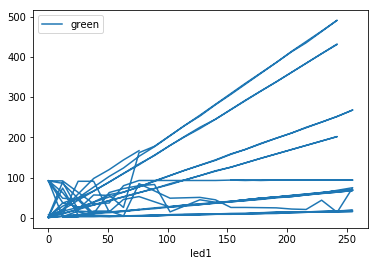

In [9]:
dfc.plot.line('led1','green')

In [6]:
df

,blue,green
time,,
2018-10-13 23:24:00.890000105,153,135
2018-10-13 23:24:01.519999981,153,135
2018-10-13 23:24:02.079999924,153,135
2018-10-13 23:24:02.640000105,153,135
2018-10-13 23:24:03.200000048,153,135
2018-10-13 23:24:03.759999990,153,135
2018-10-13 23:24:04.319999933,153,135
2018-10-13 23:24:04.880000114,153,135
2018-10-13 23:24:05.480000019,153,135


In [21]:
import plotly as plotly


plotly.offline.init_notebook_mode(connected=True)

import plotly.graph_objs as go
layout = None

trace1 = go.Scatter(x = dfc.time,
                y = dfc.green)
trace2 = go.Scatter(x = dfc.time,
                y = dfc.blue)

fig = go.Figure(data=[trace1,trace2], layout=layout)

# go.Scatter?
plotly.offline.iplot(fig)

In [ ]:
import pandas as pd
df = pd.read_csv('1013__test.csv',index_col=0).iloc[:-1]
df.set_index(pd.to_datetime(df.index,unit='s'),inplace=True)
# %matplotlib inline
# df.plot.scatter('green','blue')
df.reset_index().plot.line('time','green')

In [ ]:
#